In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = 'lombardia'

path_data = f'{path_root}/data'
path_img_root =  f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,3,Lombardia,79,25,104,127,231,65,68,...,3.0,2237.0,0.0,56.0,24.04,45.02,3.04,0.00,31.58,39.16
1,2020-02-26T18:00:00,3,Lombardia,79,25,104,145,249,18,18,...,0.0,-492.0,0.0,18.0,24.04,41.77,-3.66,0.00,0.00,7.79
2,2020-02-27T18:00:00,3,Lombardia,172,41,213,136,349,100,145,...,5.0,112.0,0.0,-9.0,19.25,61.03,129.46,0.00,64.00,40.16
3,2020-02-28T18:00:00,3,Lombardia,235,47,282,192,474,125,128,...,3.0,1515.0,0.0,56.0,16.67,59.49,8.45,0.00,14.63,35.82
4,2020-02-29T17:00:00,3,Lombardia,256,80,336,216,552,78,84,...,6.0,888.0,0.0,24.0,23.81,60.87,9.46,0.00,70.21,16.46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,2021-04-23T17:00:00,3,Lombardia,4185,644,4829,51620,56449,-1298,2304,...,57.0,46840.0,15295.0,-1122.0,13.34,8.55,4.92,15.06,-1.38,-2.25
424,2021-04-24T17:00:00,3,Lombardia,4050,611,4661,52432,57093,644,2313,...,49.0,50456.0,16478.0,812.0,13.11,8.16,4.58,14.04,-5.12,1.14
425,2021-04-25T17:00:00,3,Lombardia,3886,610,4496,53126,57622,529,1967,...,39.0,38982.0,14578.0,694.0,13.57,7.80,5.05,13.49,-0.16,0.93
426,2021-04-26T17:00:00,3,Lombardia,3824,601,4425,48539,52964,-4658,872,...,31.0,16993.0,7868.0,-4587.0,13.58,8.35,5.13,11.08,-1.48,-8.08


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 4, 27, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1369
Nuovi tamponi: 35798.0
Percentuale nuovi positivi/nuovi tamponi: 3.8 %
Nuovi guariti: 1228.0
Nuovi deceduti: 54.0
Variazione positivi ricoverati con sintomi: -5.0
Variazione positivi in terapia intensiva: -19.0
Variazione positivi in isolamento dimiciliare: 111.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 4, 27, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-26T17:00:00,3,Lombardia,4034,416,4450,56817,61267,3439,4557,...,47.0,46725.0,15061.0,3420.0,9.35,7.26,9.75,30.26,2.21,5.95
1,2021-02-27T17:00:00,3,Lombardia,4062,435,4497,59217,63714,2447,4191,...,49.0,45865.0,13513.0,2400.0,9.67,7.06,9.14,31.01,4.57,3.99
2,2021-02-28T17:00:00,3,Lombardia,4118,426,4544,61797,66341,2627,3529,...,37.0,37251.0,13253.0,2580.0,9.38,6.85,9.47,26.63,-2.07,4.12
3,2021-03-01T17:00:00,3,Lombardia,4224,441,4665,60337,65002,-1339,2135,...,42.0,20571.0,7581.0,-1460.0,9.45,7.18,10.38,28.16,3.52,-2.02
4,2021-03-02T17:00:00,3,Lombardia,4408,476,4884,62806,67690,2688,3762,...,55.0,42052.0,10113.0,2469.0,9.75,7.22,8.95,37.20,7.94,4.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-04-23T17:00:00,3,Lombardia,4185,644,4829,51620,56449,-1298,2304,...,57.0,46840.0,15295.0,-1122.0,13.34,8.55,4.92,15.06,-1.38,-2.25
57,2021-04-24T17:00:00,3,Lombardia,4050,611,4661,52432,57093,644,2313,...,49.0,50456.0,16478.0,812.0,13.11,8.16,4.58,14.04,-5.12,1.14
58,2021-04-25T17:00:00,3,Lombardia,3886,610,4496,53126,57622,529,1967,...,39.0,38982.0,14578.0,694.0,13.57,7.80,5.05,13.49,-0.16,0.93
59,2021-04-26T17:00:00,3,Lombardia,3824,601,4425,48539,52964,-4658,872,...,31.0,16993.0,7868.0,-4587.0,13.58,8.35,5.13,11.08,-1.48,-8.08


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

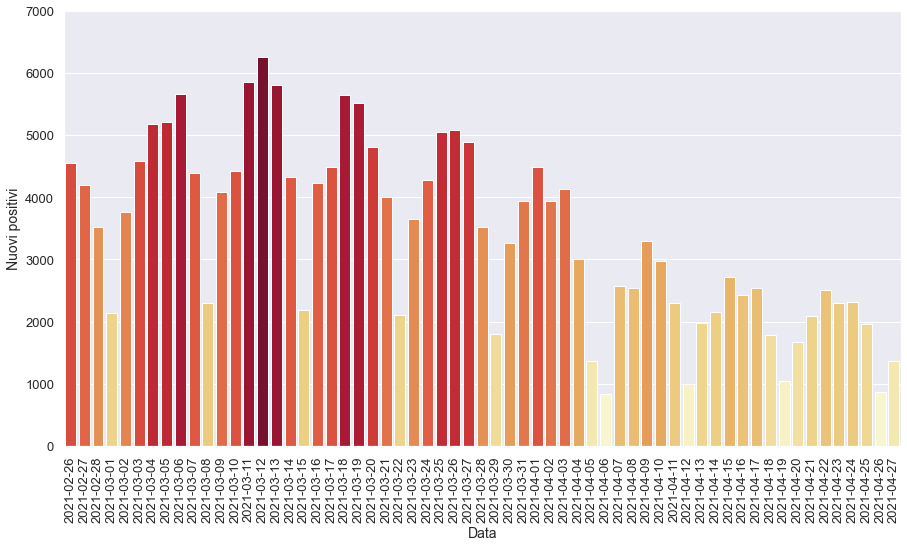

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

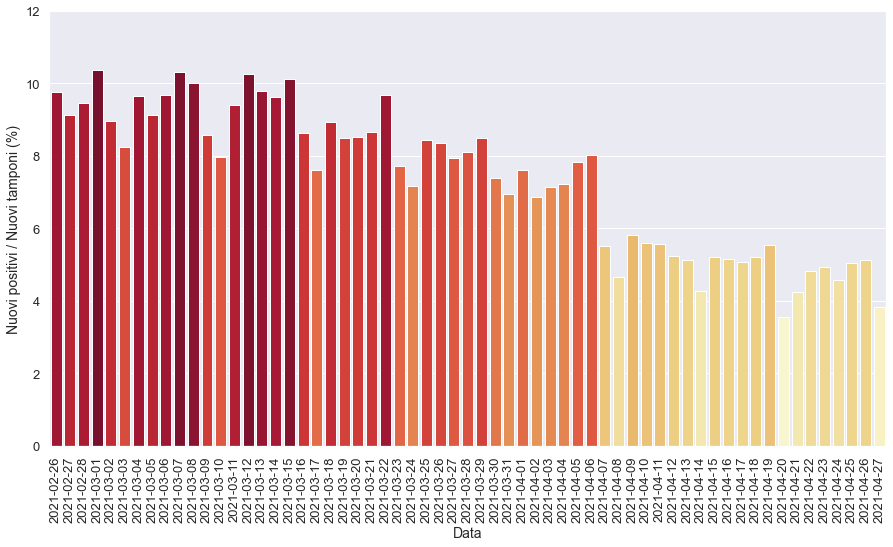

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

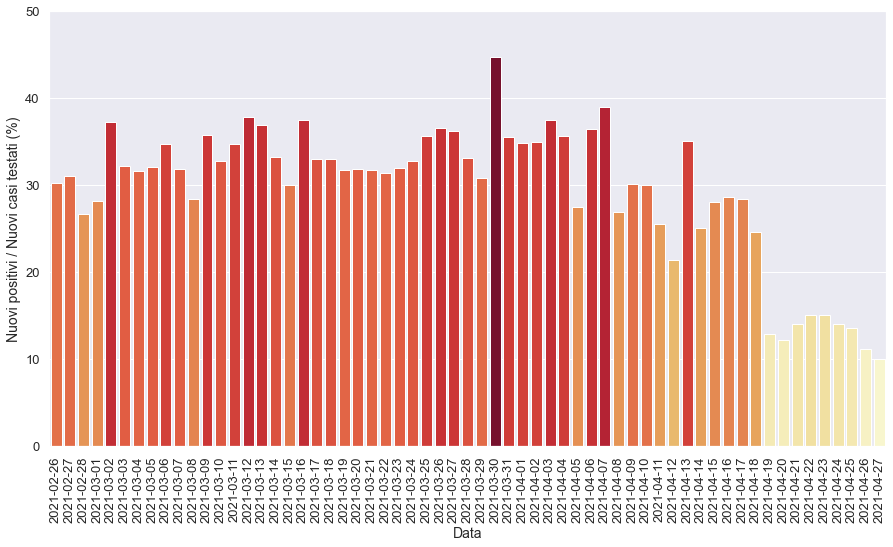

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

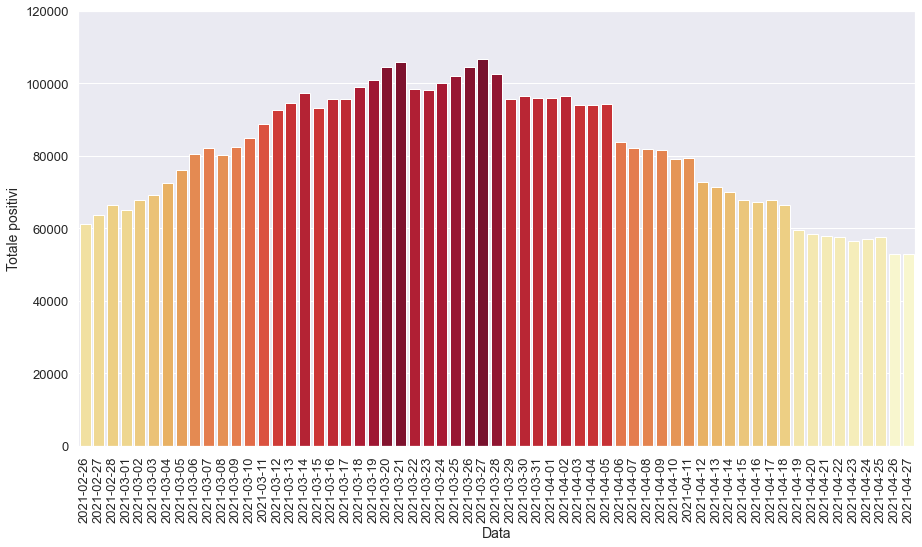

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

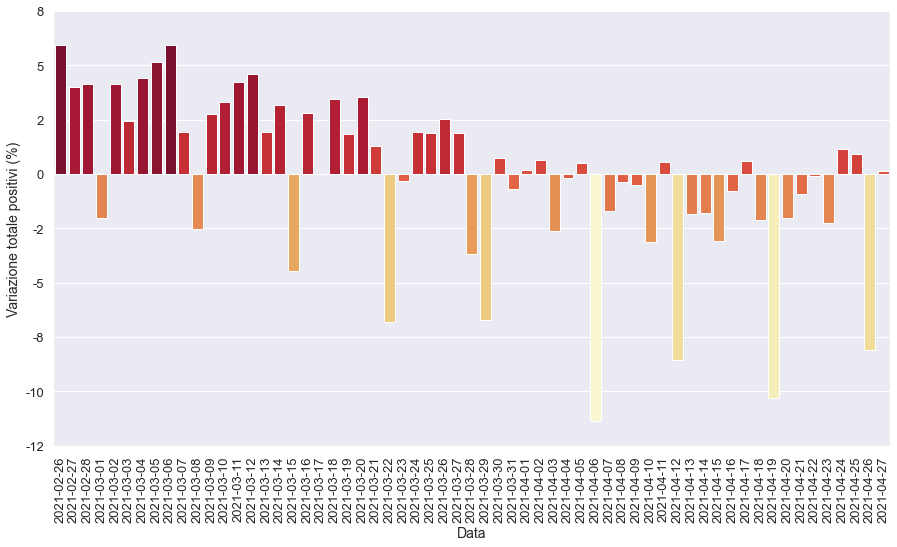

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

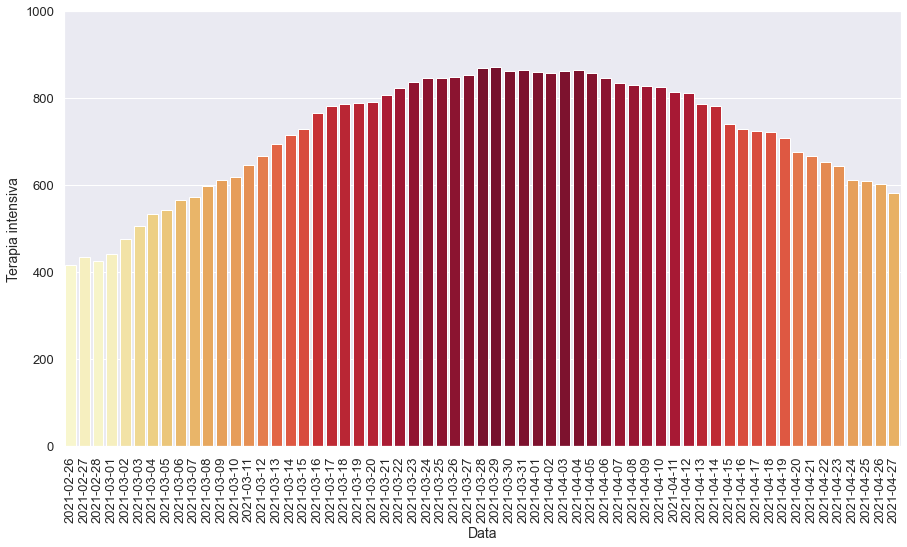

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

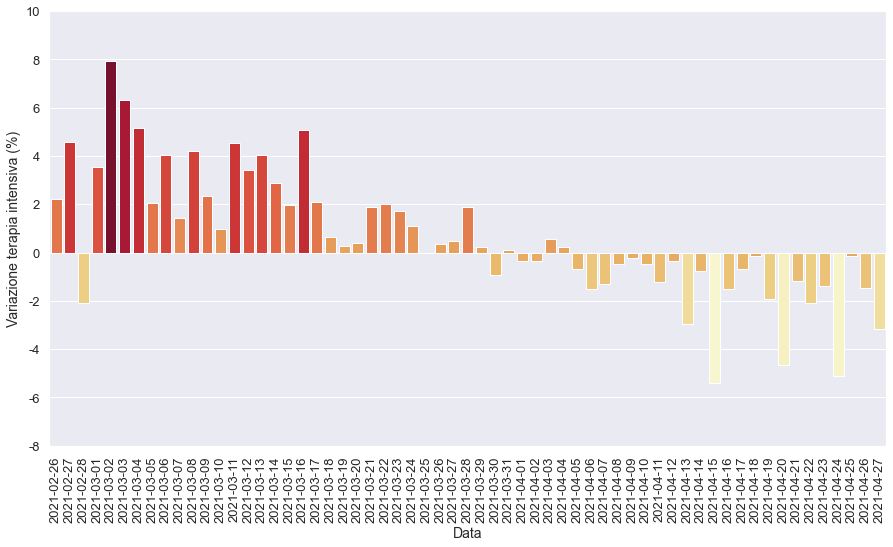

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

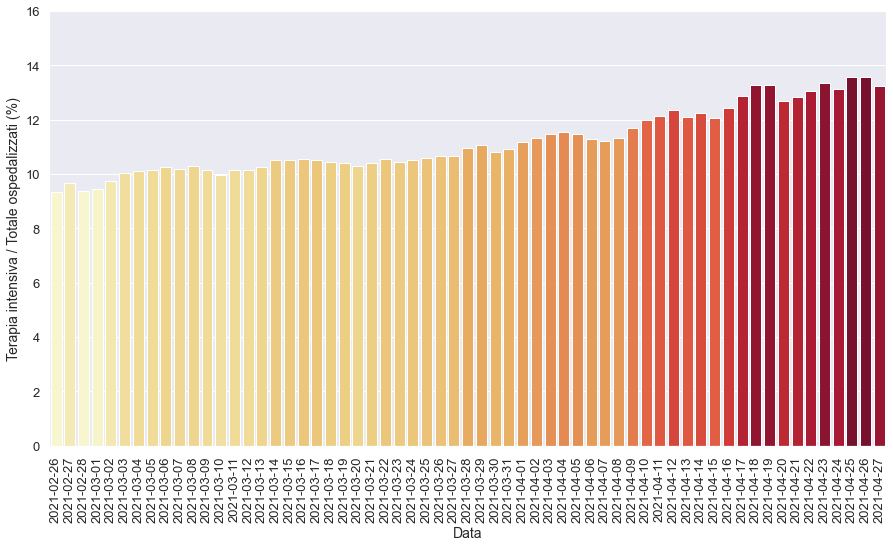

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

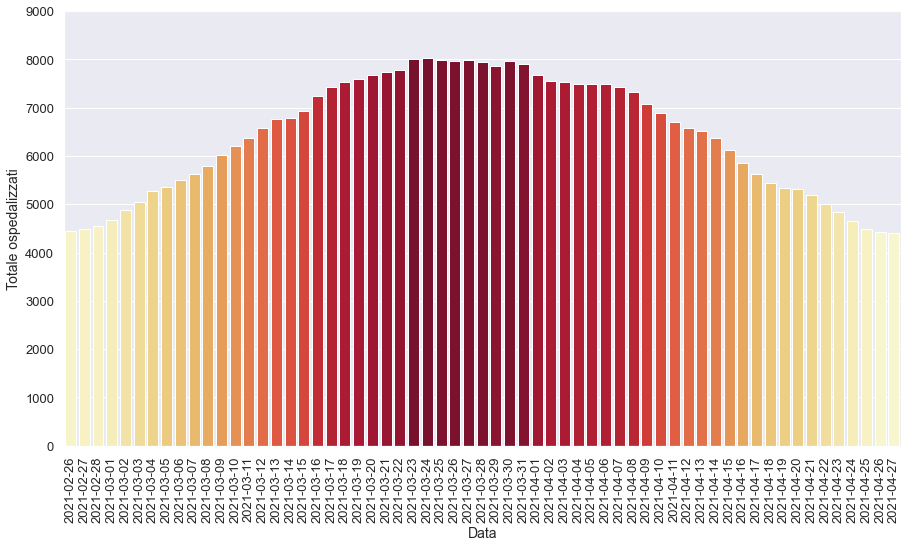

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

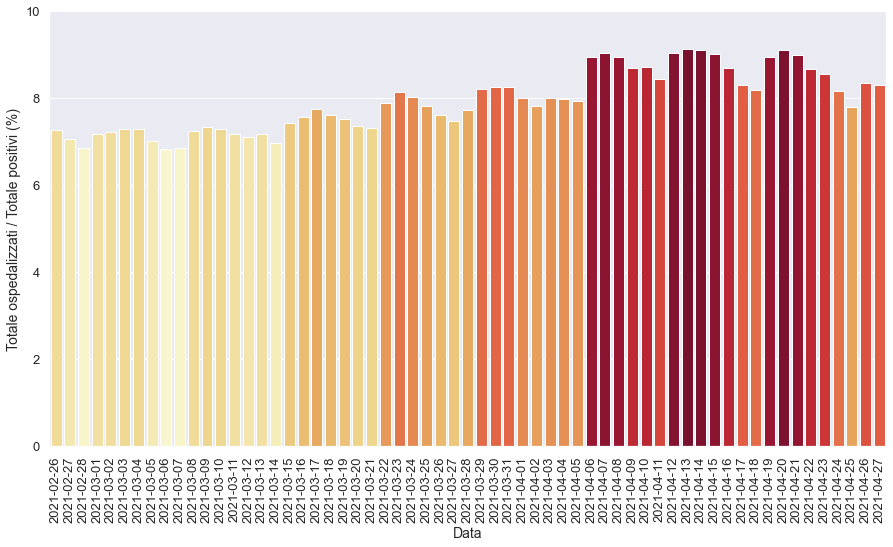

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

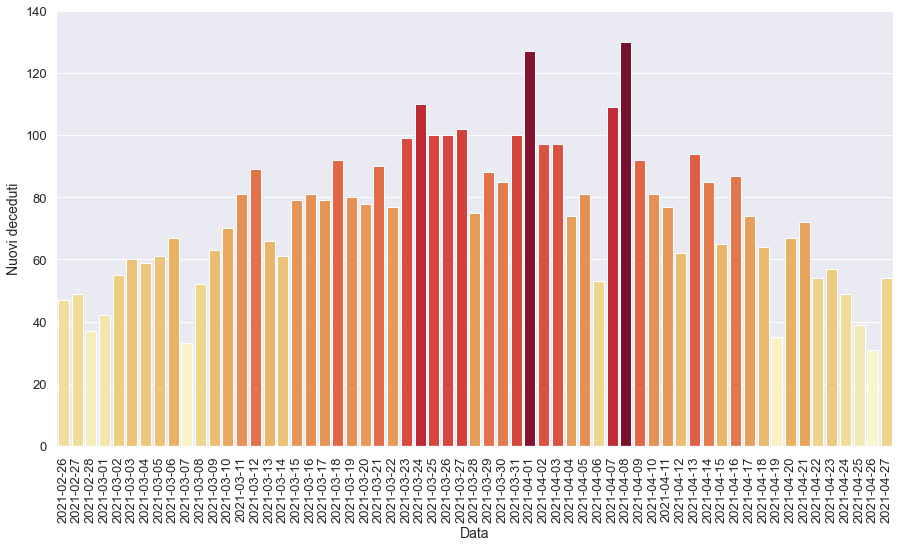

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

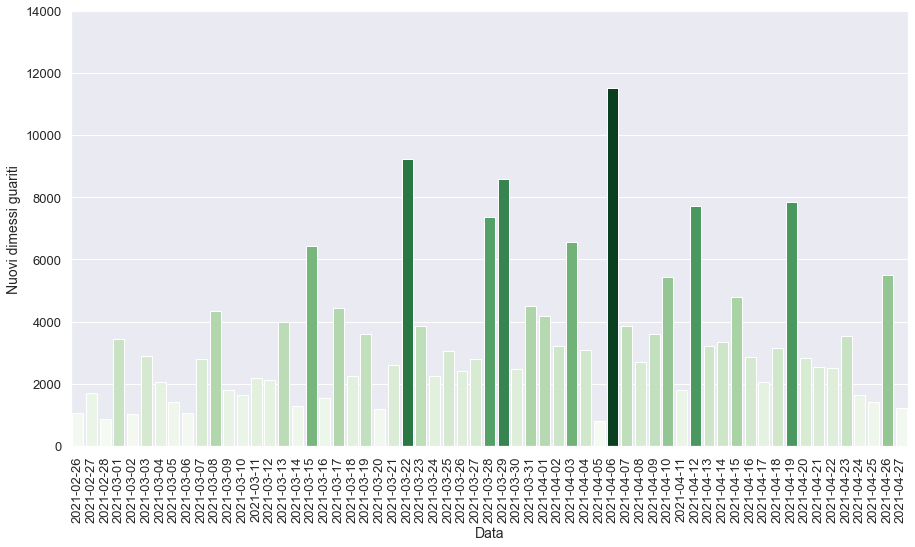

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-03-28T17:00:00,3,Lombardia,7069,868,7937,94754,102691,-3936,3520,...,75.0,43334.0,10650.0,-3897.0,10.94,7.73,8.12,33.05,1.88,-3.69
1,2021-03-29T17:00:00,3,Lombardia,6994,870,7864,87941,95805,-6886,1793,...,88.0,21137.0,5815.0,-6813.0,11.06,8.21,8.48,30.83,0.23,-6.71
2,2021-03-30T17:00:00,3,Lombardia,7109,862,7971,88551,96522,717,3271,...,85.0,44289.0,7309.0,610.0,10.81,8.26,7.39,44.75,-0.92,0.75
3,2021-03-31T17:00:00,3,Lombardia,7033,863,7896,87959,95855,-667,3943,...,100.0,56747.0,11120.0,-592.0,10.93,8.24,6.95,35.46,0.12,-0.69
4,2021-04-01T17:00:00,3,Lombardia,6823,860,7683,88351,96034,179,4483,...,127.0,58888.0,12858.0,392.0,11.19,8.00,7.61,34.87,-0.35,0.19
5,2021-04-02T17:00:00,3,Lombardia,6703,857,7560,89096,96656,622,3941,...,97.0,57421.0,11275.0,745.0,11.34,7.82,6.86,34.95,-0.35,0.65
6,2021-04-03T17:00:00,3,Lombardia,6660,862,7522,86603,94125,-2531,4132,...,97.0,57954.0,11042.0,-2493.0,11.46,7.99,7.13,37.42,0.58,-2.62
7,2021-04-04T17:00:00,3,Lombardia,6622,864,7486,86478,93964,-161,3003,...,74.0,41537.0,8436.0,-125.0,11.54,7.97,7.23,35.60,0.23,-0.17
8,2021-04-05T17:00:00,3,Lombardia,6626,858,7484,86947,94431,467,1358,...,81.0,17340.0,4956.0,469.0,11.46,7.93,7.83,27.40,-0.69,0.50
9,2021-04-06T17:00:00,3,Lombardia,6643,845,7488,76211,83699,-10732,841,...,53.0,10467.0,2310.0,-10736.0,11.28,8.95,8.03,36.41,-1.52,-11.36


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

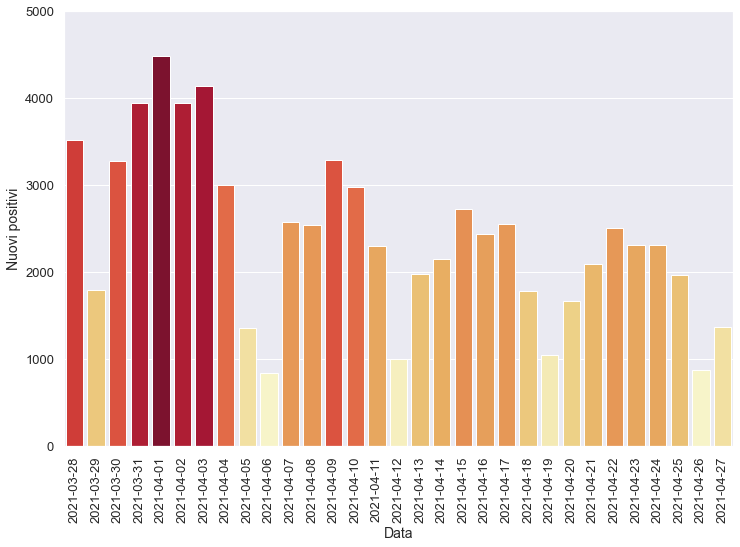

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

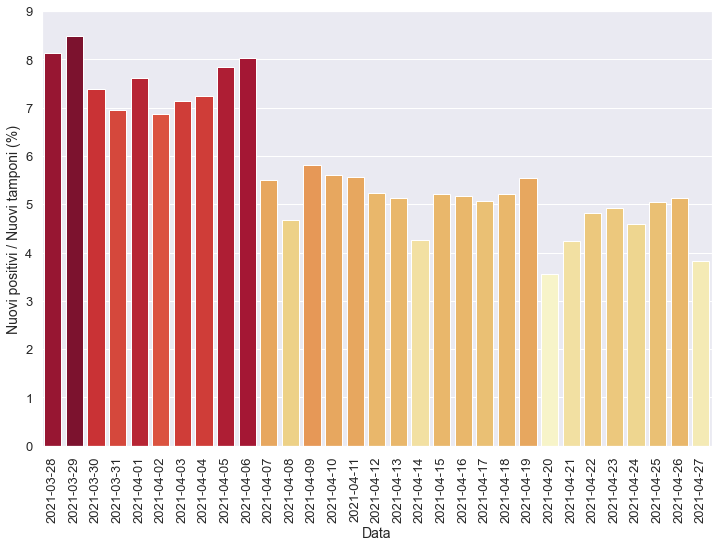

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

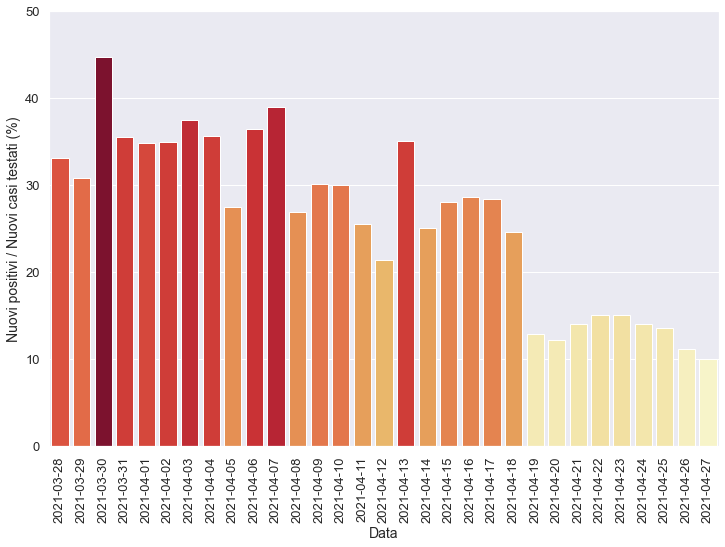

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

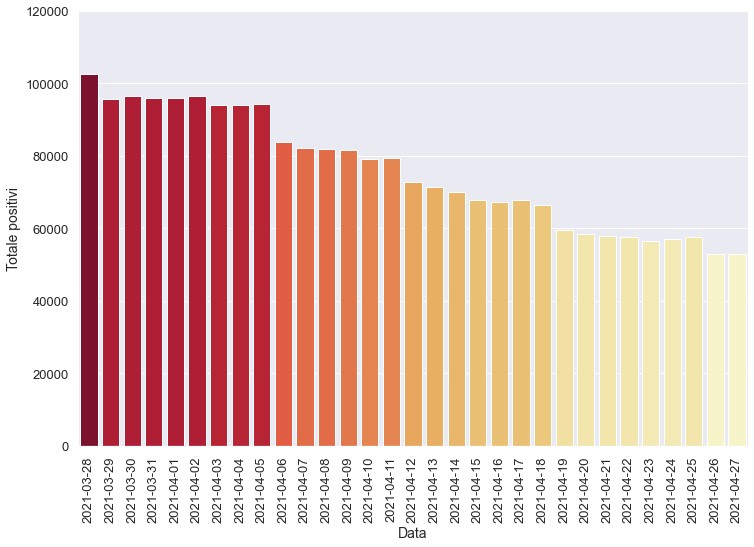

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

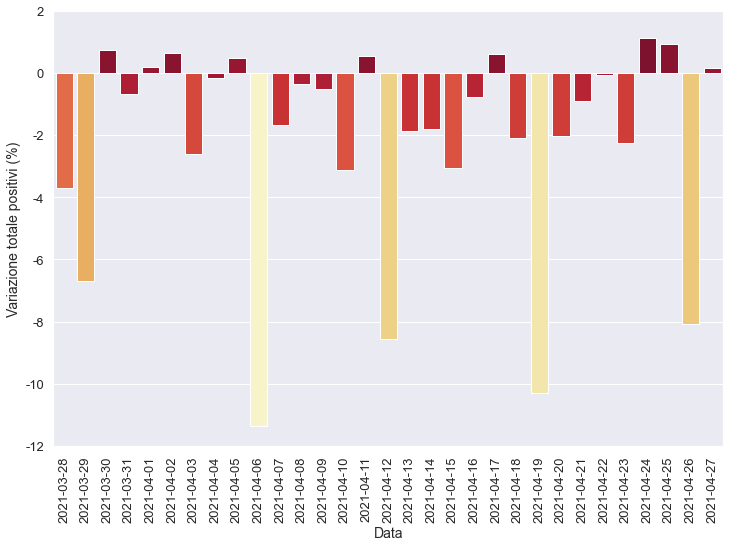

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

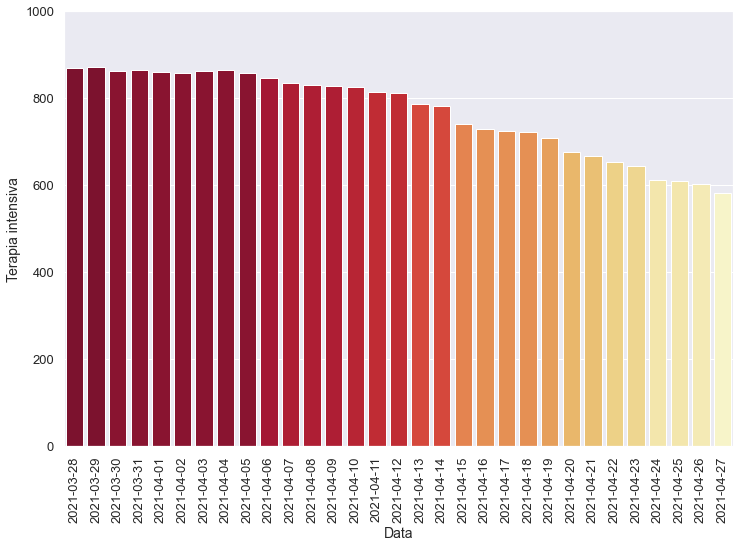

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

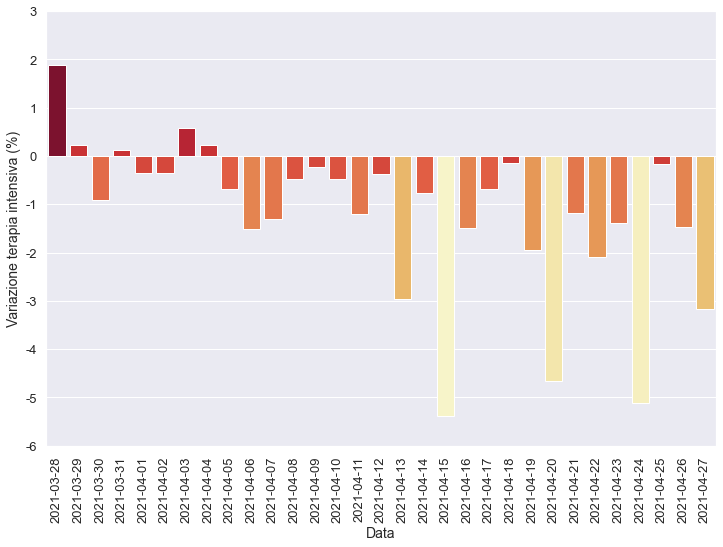

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

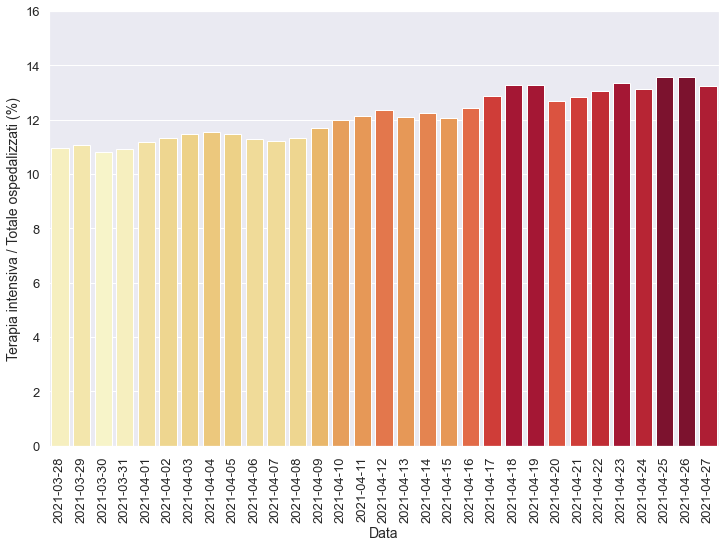

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

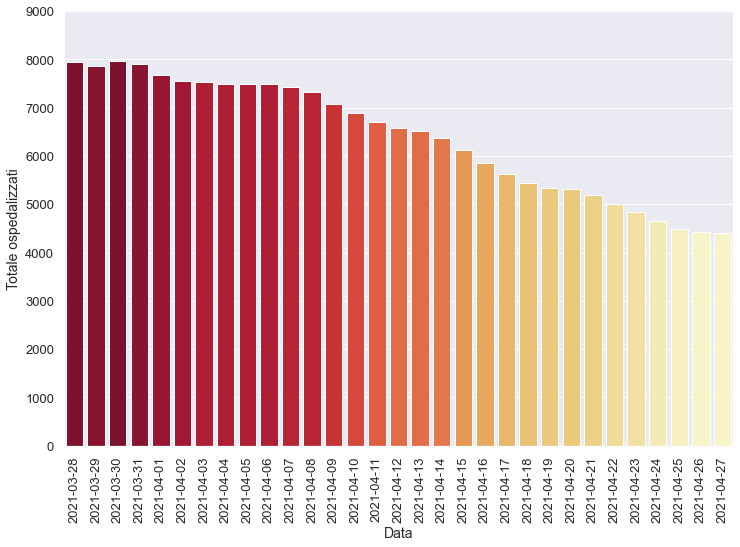

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

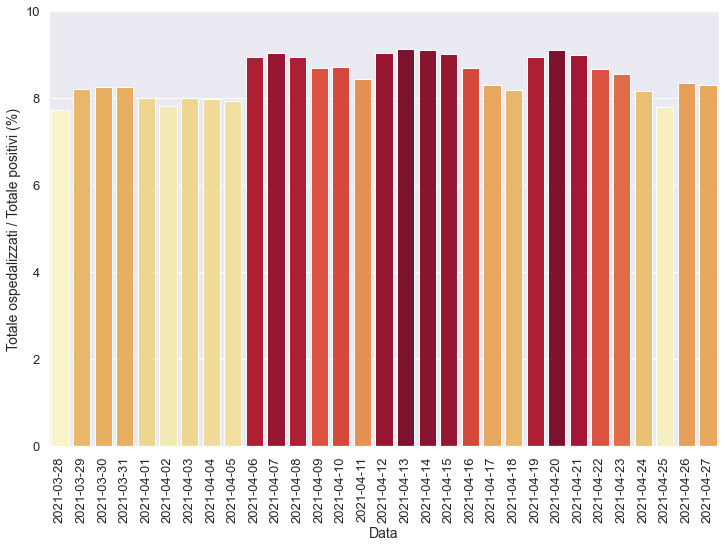

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

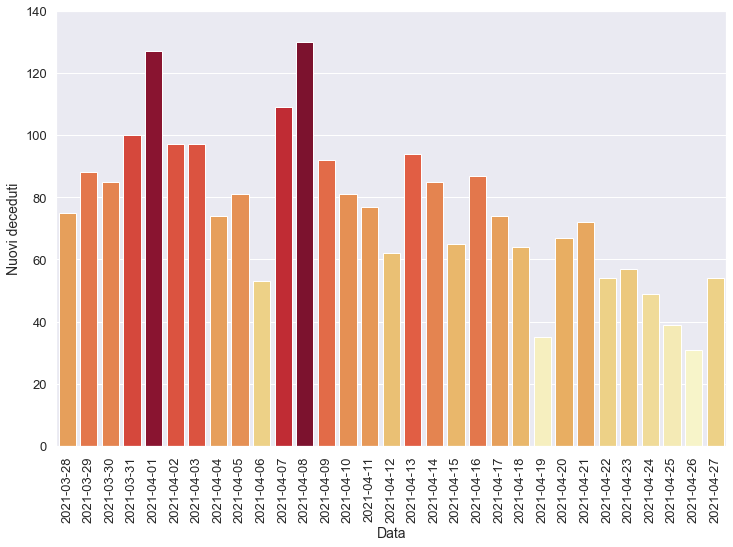

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

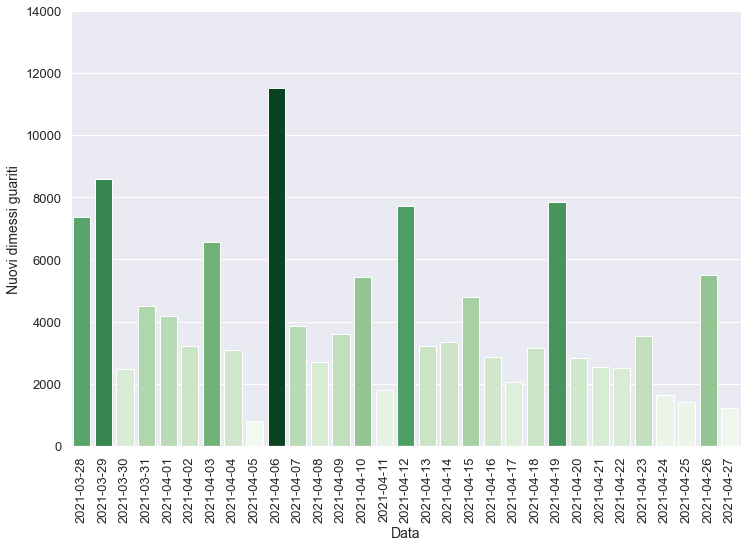

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-04-20T17:00:00,3,Lombardia,4639,675,5314,53005,58319,-1213,1670,...,67.0,46901.0,13769.0,-1196.0,12.70,9.11,3.56,12.13,-4.66,-2.04
1,2021-04-21T17:00:00,3,Lombardia,4522,667,5189,52601,57790,-529,2095,...,72.0,49417.0,14947.0,-404.0,12.85,8.98,4.24,14.02,-1.19,-0.91
2,2021-04-22T17:00:00,3,Lombardia,4352,653,5005,52742,57747,-43,2509,...,54.0,52170.0,16676.0,141.0,13.05,8.67,4.81,15.05,-2.10,-0.07
3,2021-04-23T17:00:00,3,Lombardia,4185,644,4829,51620,56449,-1298,2304,...,57.0,46840.0,15295.0,-1122.0,13.34,8.55,4.92,15.06,-1.38,-2.25
4,2021-04-24T17:00:00,3,Lombardia,4050,611,4661,52432,57093,644,2313,...,49.0,50456.0,16478.0,812.0,13.11,8.16,4.58,14.04,-5.12,1.14
5,2021-04-25T17:00:00,3,Lombardia,3886,610,4496,53126,57622,529,1967,...,39.0,38982.0,14578.0,694.0,13.57,7.80,5.05,13.49,-0.16,0.93
6,2021-04-26T17:00:00,3,Lombardia,3824,601,4425,48539,52964,-4658,872,...,31.0,16993.0,7868.0,-4587.0,13.58,8.35,5.13,11.08,-1.48,-8.08
7,2021-04-27T17:00:00,3,Lombardia,3819,582,4401,48650,53051,87,1369,...,54.0,35798.0,13670.0,111.0,13.22,8.30,3.82,10.01,-3.16,0.16


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

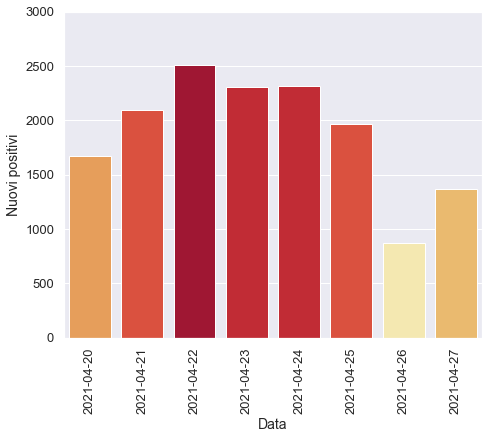

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

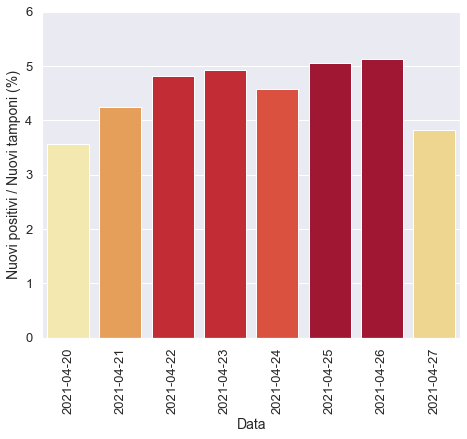

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

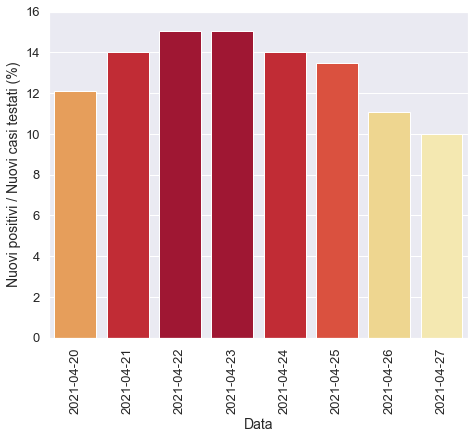

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

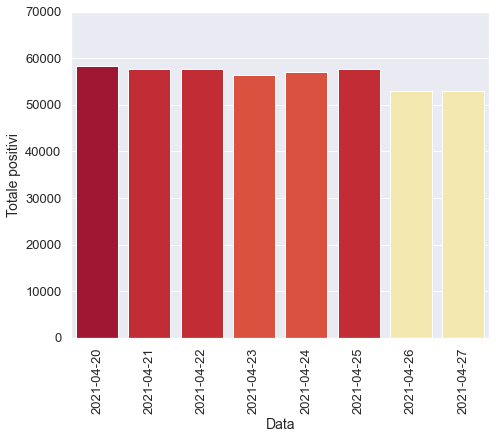

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

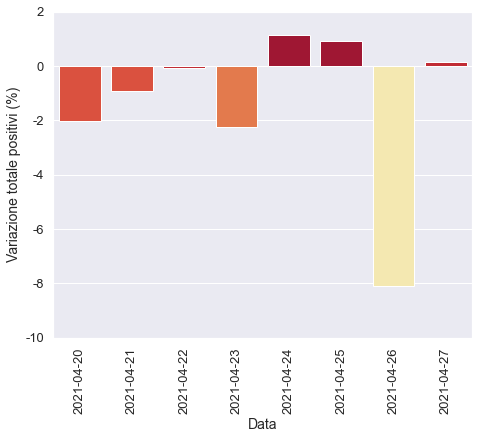

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

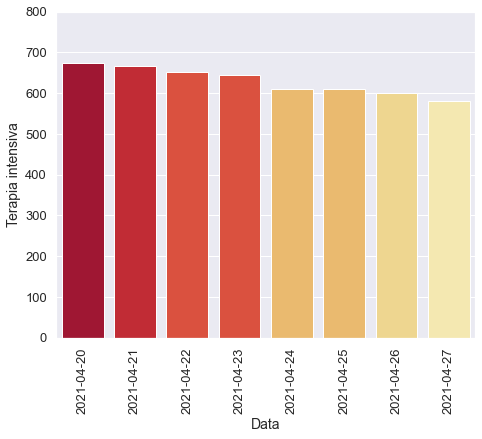

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

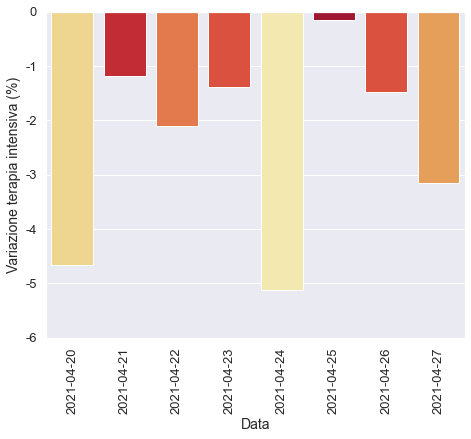

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

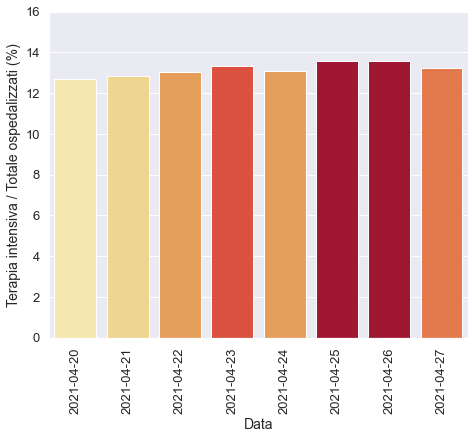

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

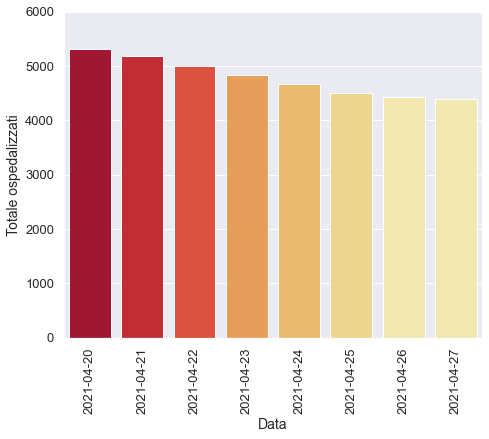

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

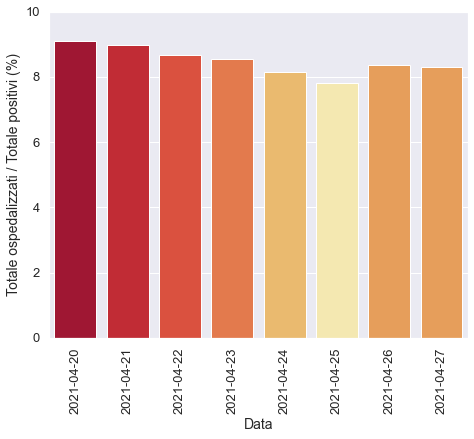

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

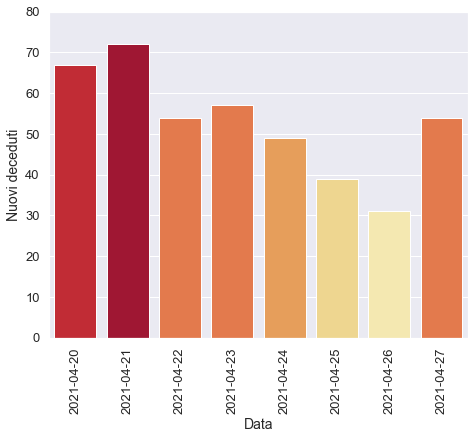

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

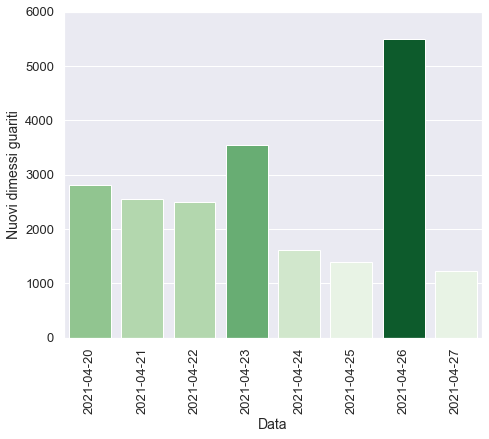

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)